In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os 
from shapely.geometry import Point, Polygon, shape
working_dir = os.getcwd()

import geopandas as gpd

In [3]:
city_name = 'Kreuzberg'

In [4]:
hexagons = gpd.read_file(f'{working_dir}/data/{city_name}_hexagons.gpkg')

In [5]:
hexagons

,hex_id,_merge,geometry
0,8a1f18b25867fff,1.0,"POLYGON ((13.41245 52.50037, 13.41213 52.49976..."
1,8a1f18b25477fff,1.0,"POLYGON ((13.40441 52.48684, 13.40409 52.48624..."
2,8a1f18b2499ffff,1.0,"POLYGON ((13.36785 52.49553, 13.36754 52.49492..."
3,8a1f18b24967fff,1.0,"POLYGON ((13.37436 52.50051, 13.37404 52.49990..."
4,8a1f1d4d679ffff,1.0,"POLYGON ((13.42578 52.50153, 13.42546 52.50092..."
...,...,...,...
1327,8a1f18b2096ffff,0.0,"POLYGON ((13.39519 52.48417, 13.39487 52.48356..."
1328,8a1f1d4d602ffff,0.0,"POLYGON ((13.42869 52.51086, 13.42838 52.51026..."
1329,8a1f1d4d2147fff,0.0,"POLYGON ((13.44864 52.49657, 13.44832 52.49597..."
1330,8a1f1d48bc47fff,0.0,"POLYGON ((13.38415 52.50991, 13.38384 52.50930..."


<AxesSubplot:>

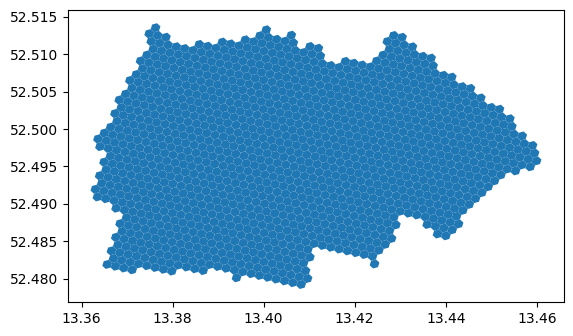

In [6]:
hexagons.plot()

In [7]:
hexagons['geometry'][0].centroid.y

52.49994155487061

https://github.com/gboeing/osmnx-examples/blob/main/notebooks/02-routing-speed-time.ipynb

https://gist.github.com/psychemedia/b49c49da365666ba9199d2e27d002d07

In [27]:
import osmnx as ox
import networkx as nx

ox.config(log_console=True, use_cache=True)

# define the start and end locations in latlng
start_latlng = (37.78497,-122.43327)
X1 = 13,3814727
Y1 = 52,5139842
end_latlng = (37.78071,-122.41445)# location where you want to find your route
X2 = 13,3946421
Y2 = 52,5087024

place     = 'Berlin, DE'# find shortest route based on the mode of travel
mode      = 'walk'        # 'drive', 'bike', 'walk'# find shortest path based on distance or time
optimizer = 'time'        # 'length','time'# create graph from OSM within the boundaries of some 
# geocodable place(s)

graph = ox.graph_from_place(place, network_type = mode)# find the nearest node to the start location
orig_node = ox.nearest_nodes(graph, X1,Y1 )# find the nearest node to the end location
dest_node = ox.nearest_nodes(graph, X2,Y2)#  find the shortest path
shortest_route = nx.shortest_path(graph,
                                  orig_node,
                                  dest_node,
                                  weight=optimizer)

/home/laia/.pyenv/versions/3.8.12/envs/notebooksenv/lib/python3.8/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


: 

: 

In [ ]:
graph = ox.graph_from_place('Kreuzberg, DE', network_type = mode)
ox.plot_graph(ox.project_graph(graph))

In [ ]:
orig_node

7732585293

In [ ]:
dest_node

7732585293

In [ ]:
shortest_route_map = ox.plot_route_folium(graph, shortest_route)
shortest_route_map

ValueError: graph contains no edges